In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#converting into dataframe
df_hr = pd.read_csv('hour.csv')

In [3]:
df_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df_hr=df_hr.drop(['dteday'],axis=1)

In [5]:

print(df_hr.shape)

(17379, 16)


### Imputing Missing Values 

In [6]:
df_hr.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_hr['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [8]:
df_hr['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [9]:
df_hr['mnth'].value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64

In [10]:
df_hr['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [11]:
df_hr['weekday'].value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [12]:
df_hr['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [13]:
df_hr['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

As we see instant is the given id for each entry ,so we are droping it and using the default index

In [14]:
df_hr.drop('instant',axis=1,inplace=True)

# 3. Exploratory Data Analysis Data Visualization

## A.Univariate analysis

(array([ 117.,  953., 2444., 2913., 2433., 2684., 3150., 1976.,  625.,
          84.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <a list of 10 Patch objects>)

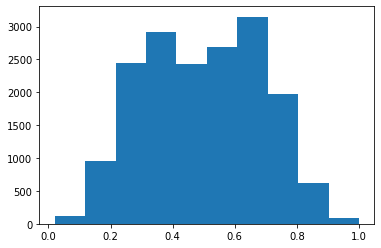

In [15]:
plt.hist( df_hr['temp'],bins=10)

(array([  78.,  786., 2342., 2631., 3047., 3216., 3942., 1044.,  279.,
          14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

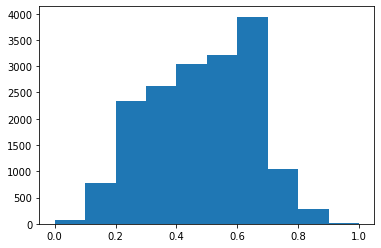

In [16]:
plt.hist( df_hr['atemp'],bins=10)

(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

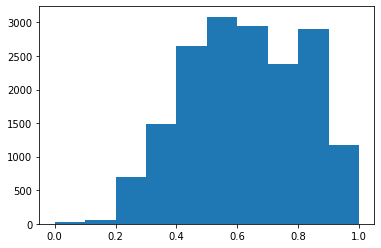

In [17]:
plt.hist( df_hr['hum'],bins=10)

(array([2036., 2843., 3205., 1545., 2548., 2203.,  427.,  611.,  404.,
         112.]),
 array([0.     , 0.05522, 0.11044, 0.16566, 0.22088, 0.2761 , 0.33132,
        0.38654, 0.44176, 0.49698, 0.5522 ]),
 <a list of 10 Patch objects>)

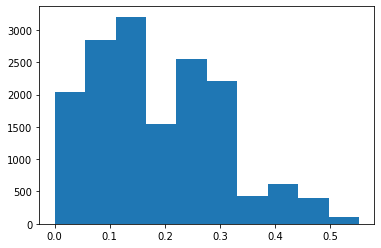

In [34]:
plt.hist( df_hr['windspeed'],bins=10)

Skewed data lets apply log transform on it

In [35]:
windspeed_transformed = np.log(df_hr['windspeed']+ 1)
windspeed_transformed.describe()

count    15934.000000
mean         0.165782
std          0.098295
min          0.000000
25%          0.099393
50%          0.152034
75%          0.226099
max          0.439673
Name: windspeed, dtype: float64

(array([2036., 1325., 3157., 1566., 2928., 2826.,  969.,  611.,  298.,
         218.]),
 array([0.        , 0.04396733, 0.08793466, 0.13190198, 0.17586931,
        0.21983664, 0.26380397, 0.3077713 , 0.35173862, 0.39570595,
        0.43967328]),
 <a list of 10 Patch objects>)

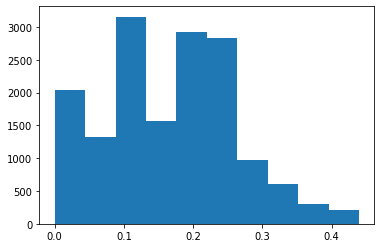

In [36]:
plt.hist(windspeed_transformed,bins=10)

(array([8750., 2588., 1601., 1206.,  699.,  367.,  268.,  173.,  135.,
         147.]),
 array([  0. ,  18.3,  36.6,  54.9,  73.2,  91.5, 109.8, 128.1, 146.4,
        164.7, 183. ]),
 <a list of 10 Patch objects>)

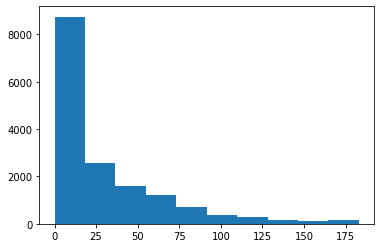

In [41]:
plt.hist( df_hr['casual'],bins=10)

Data is skewed lets apply log transform on it

In [43]:
casual_transformed = np.log(df_hr['casual']+1)
casual_transformed.describe()

count    15934.000000
mean         2.595785
std          1.431710
min          0.000000
25%          1.386294
50%          2.772589
75%          3.761200
max          5.214936
Name: casual, dtype: float64

(array([1536., 1031., 1433., 1850., 1593., 1841., 2157., 2151., 1596.,
         746.]),
 array([0.        , 0.52149358, 1.04298715, 1.56448073, 2.0859743 ,
        2.60746788, 3.12896145, 3.65045503, 4.17194861, 4.69344218,
        5.21493576]),
 <a list of 10 Patch objects>)

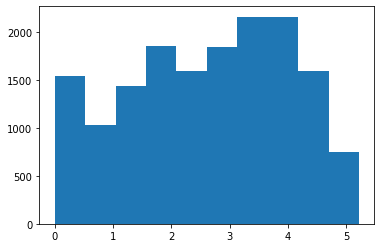

In [45]:
plt.hist( casual_transformed,bins=10)

(array([7262., 4279., 2764., 1341.,  727.,  445.,  220.,  181.,  134.,
          26.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <a list of 10 Patch objects>)

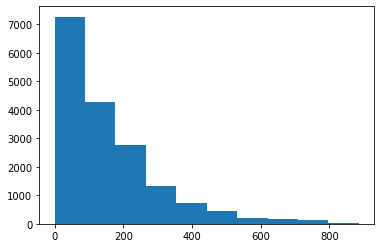

In [19]:
plt.hist( df_hr['registered'],bins=10)

In [52]:
registered_transformed = np.log(df_hr['registered']+1)
registered_transformed.describe()

count    15934.000000
mean         4.300652
std          1.375025
min          0.000000
25%          3.465736
50%          4.700480
75%          5.318120
max          6.406880
Name: registered, dtype: float64

(array([  22.,  430.,  856., 1067., 1049., 1329., 2108., 3775., 3739.,
        1559.]),
 array([0.        , 0.640688  , 1.281376  , 1.922064  , 2.56275199,
        3.20343999, 3.84412799, 4.48481599, 5.12550399, 5.76619199,
        6.40687999]),
 <a list of 10 Patch objects>)

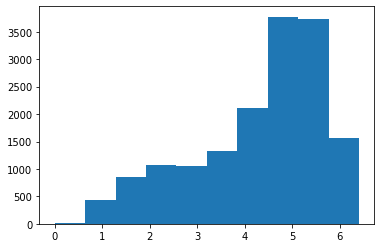

In [53]:
plt.hist( registered_transformed,bins=10)

In [ ]:
df_hr['windspeed']=windspeed_transformed
df_hr['registered']=registered_transformed

## B. Bivariate Analysis

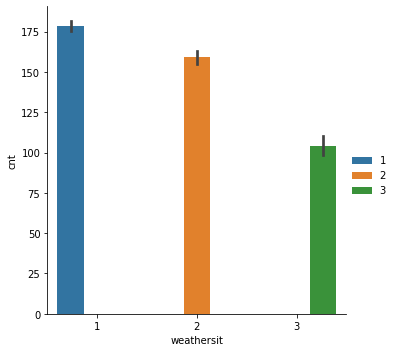

In [61]:
sns.catplot(x="weathersit", y="cnt",hue="weathersit", kind="bar", data=df_hr)\
             .add_legend();

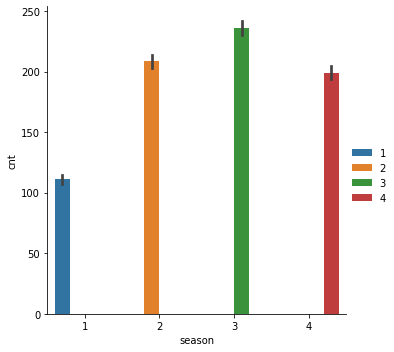

In [21]:
sns.catplot(x="season", y="cnt",hue="season", kind="bar", data=df_hr)\
             .add_legend();

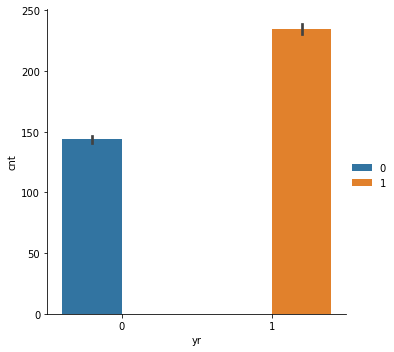

In [22]:
sns.catplot(x="yr", y="cnt",hue="yr", kind="bar", data=df_hr)\
             .add_legend();

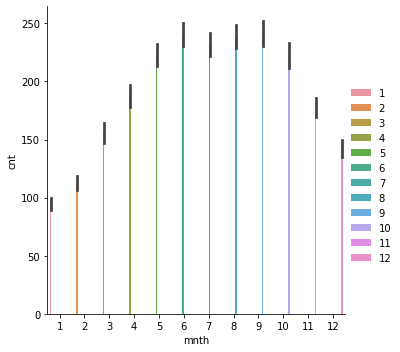

In [23]:
sns.catplot(x="mnth", y="cnt",hue="mnth", kind="bar", data=df_hr)\
             .add_legend();

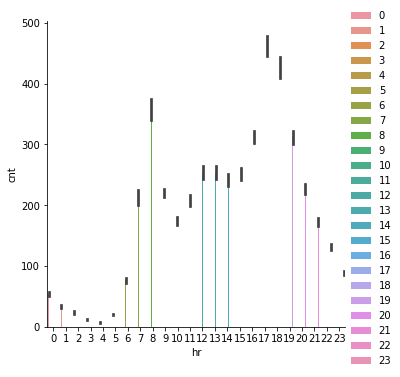

In [24]:
sns.catplot(x="hr", y="cnt",hue="hr", kind="bar", data=df_hr)\
             .add_legend();

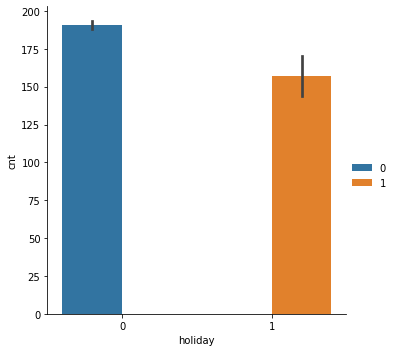

In [25]:
sns.catplot(x="holiday", y="cnt",hue="holiday", kind="bar", data=df_hr)\
             .add_legend();

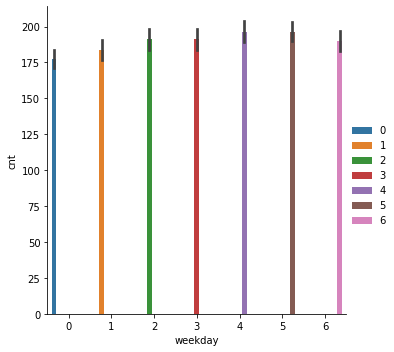

In [26]:
sns.catplot(x="weekday", y="cnt",hue="weekday", kind="bar", data=df_hr)\
             .add_legend();

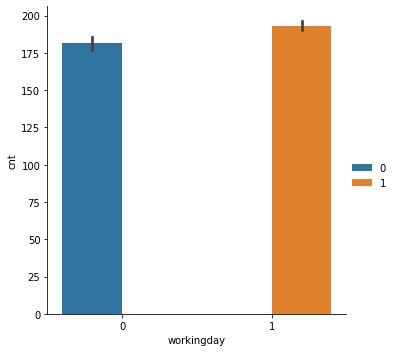

In [27]:
sns.catplot(x="workingday", y="cnt",hue="workingday", kind="bar", data=df_hr)\
             .add_legend();

# 4. Data pre-processing and cleaning

## A.Converting all features to numerical features 

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

## B.Removing outliers using standard methods

In [15]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df_hr))
print(np.where(z>3))
df_hr=df_hr[(z<3).all(axis=1)]

(array([  265,   372,   373, ..., 17341, 17343, 17344], dtype=int64), array([11,  4,  4, ..., 11, 11, 11], dtype=int64))


### C .Train_test Split

In [16]:
y=df_hr['cnt']
x=df_hr.drop(['cnt'],axis=1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [18]:
round(X_train, 2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
8487,1,0,12,8,0,0,0,1,0.20,0.21,0.80,0.16,1,4
6380,4,0,9,10,0,3,1,2,0.62,0.55,0.94,0.00,20,109
13048,3,1,7,21,0,1,1,1,0.76,0.68,0.45,0.13,17,241
8225,4,0,12,9,0,3,1,2,0.30,0.33,0.61,0.00,9,230
12556,2,1,6,9,0,2,1,2,0.64,0.58,0.89,0.28,31,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14471,3,1,8,4,0,5,1,1,0.64,0.58,0.89,0.13,0,7
5621,3,0,8,3,0,6,0,2,0.70,0.67,0.84,0.22,8,22
889,1,0,2,13,0,3,1,1,0.18,0.17,0.40,0.25,2,67
17237,1,1,12,2,0,3,1,2,0.26,0.23,0.65,0.30,0,1


# 5. Building Models

# Model1 : KNN

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,10,1)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
clf.best_params_

{'n_neighbors': 6}

In [83]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(X_train, y_train)

y_test_pred = neigh.predict(X_test)
print(r2_score(y_test,y_test_pred))


0.9997922953569758


# Model 2 : Logistic Regression 

# Model 3 : Linear regression 

In [31]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_test_pred = Lr.predict(X_test)

print(r2_score(y_test,y_test_pred))

1.0


# Model 4 : SVM

In [ ]:
from sklearn.svm import SVR

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

In [ ]:
model.best_params_

In [ ]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVR(C=k,gamma= 0.0001,kernel='linear')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

In [ ]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [20]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
clf = SVR(C=100,gamma=0.001,kernel= 'linear')

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9999997328393483


# Model 5 : Decision Tree

In [20]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
1.0


In [21]:
model.best_params_

{'max_depth': 50}

In [23]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[0.6807302260715884, 0.9870353899751944, 0.9950209305853563, 0.9950209305853563, 0.9950209305853563]


Text(0, 0.5, 'Cross-Validated Accuracy')

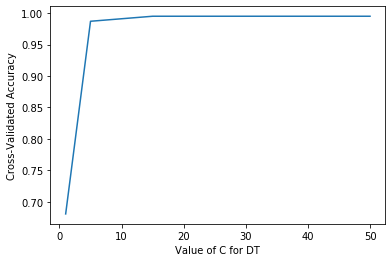

In [24]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for DT')
plt.ylabel('Cross-Validated Accuracy')

# Traning with best hyperparameters

In [23]:
from sklearn.metrics import r2_score
clf = DecisionTreeRegressor(criterion='mse',max_depth=50,min_samples_split=2)

clf.fit(X_train, y_train)


y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9992905943918247


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [24]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9999708493442188


In [25]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=100,n_estimators=100,criterion='mse' )
RF.fit(X_train, y_train)

y_test_pred = RF.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9997636927924382


# Boosting

In [26]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
0.9997960164530775


In [27]:
from sklearn.model_selection import GridSearchCV

clf=GradientBoostingRegressor(max_depth=5,n_estimators=100)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9997958564275262


## Note: As we have very less data stascking is not advisable 

# Xgboost

In [28]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_test_pred = xgb_model.predict(X_test)

print(r2_score(y_test,y_test_pred))



[17:17:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9994668000961933


# 6.Model Comparison

In [29]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '0.9997' ])
table.add_row(["Linear Regression" ,'1.0' ])
table.add_row(["SVM", '0.9999' ])
table.add_row(["Decision Tree",'0.9928' ])
table.add_row(["RandomForest",'9976' ])
table.add_row(["GBDT" ,'0.9997' ])
table.add_row(["Xgboost",'0.9994' ])
print(table)

+-------------------+----------+
|       Model       | r2_score |
+-------------------+----------+
|        KNN        |  0.9997  |
| Linear Regression |   1.0    |
|        SVM        |  0.9999  |
|   Decision Tree   |  0.9928  |
|    RandomForest   |   9976   |
|        GBDT       |  0.9997  |
|      Xgboost      |  0.9994  |
+-------------------+----------+


Summary:<br>
1.Even simple models like linear regression performs very well , so we use linear regrssion as final model because its more interpretable aslo.   

# 7.Creating Submission File

In [32]:
best_model=Lr
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']